# ME5060: Spacecraft Dynamics and Control
## ME21BTECH11001 Abhishek Ghosh
## Problem A

In [1]:
%reset -f
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib notebook

## 1. Simulate the orbital motion of the Earth around the Sun. [5 Points] 

In [2]:
# Constants
G = 6.67430e-11  # Gravitational constant
M_sun = 1.989e30  # Mass of the Sun (kg)
M_earth = 5.972e24  # Mass of the Earth (kg)

# Initial conditions
pos_sun = np.array([0, 0, 0])
vel_sun = np.array([0, 0, 0])
pos_earth = np.array([-8.697057015299645E+10, 1.188738543717089E+11, -6.455870720483363E+06])
vel_earth = np.array([-2.451782463229322E+04, -1.769234812356168E+04, 1.659193200505449E+0])
initial_pos_earth = pos_earth.copy()

orbital_period = 0
global min_dist
min_dist = 1e18

In [3]:
def TwoBodyProblem(t, state, G, M1, M2):
    pos1, pos2 = state[:3], state[3:6]
    vel1, vel2 = state[6:9], state[9:12]

    global min_dist
    global orbital_period
    if ((sci.linalg.norm(pos2 - initial_pos_earth)) < min_dist and t > 1e6):
        min_dist = sci.linalg.norm(pos2 - initial_pos_earth)
        orbital_period = t

    dist = sci.linalg.norm(pos2 - pos1)
    accel1 = G * M2 * (pos2 - pos1) / dist**3
    accel2 = G * M1 * (pos1 - pos2) / dist**3

    pos_dot = np.concatenate((vel1, vel2))
    vel_dot = np.concatenate((accel1, accel2))

    return np.concatenate((pos_dot, vel_dot))

In [4]:
# Initial state
init_state = np.array([pos_sun, pos_earth, vel_sun, vel_earth]).flatten()
time_steps = np.linspace(0, 365.25 * 24 * 3600, 1000)  # One year in seconds

# Solve the equations
solution = solve_ivp(
    fun=TwoBodyProblem,
    t_span=(time_steps[0], time_steps[-1]),
    y0=init_state,
    args=(G, M_sun, M_earth),
    t_eval=time_steps,
    method='RK23',
    dense_output=True
)

pos_solutions = solution.y.T
sun_positions = pos_solutions[:, :3]
earth_positions = pos_solutions[:, 3:6]

print(f"Orbital period of Earth around the Sun is {orbital_period} seconds")

Orbital period of Earth around the Sun is 31557600.0 seconds


<IPython.core.display.Javascript object>


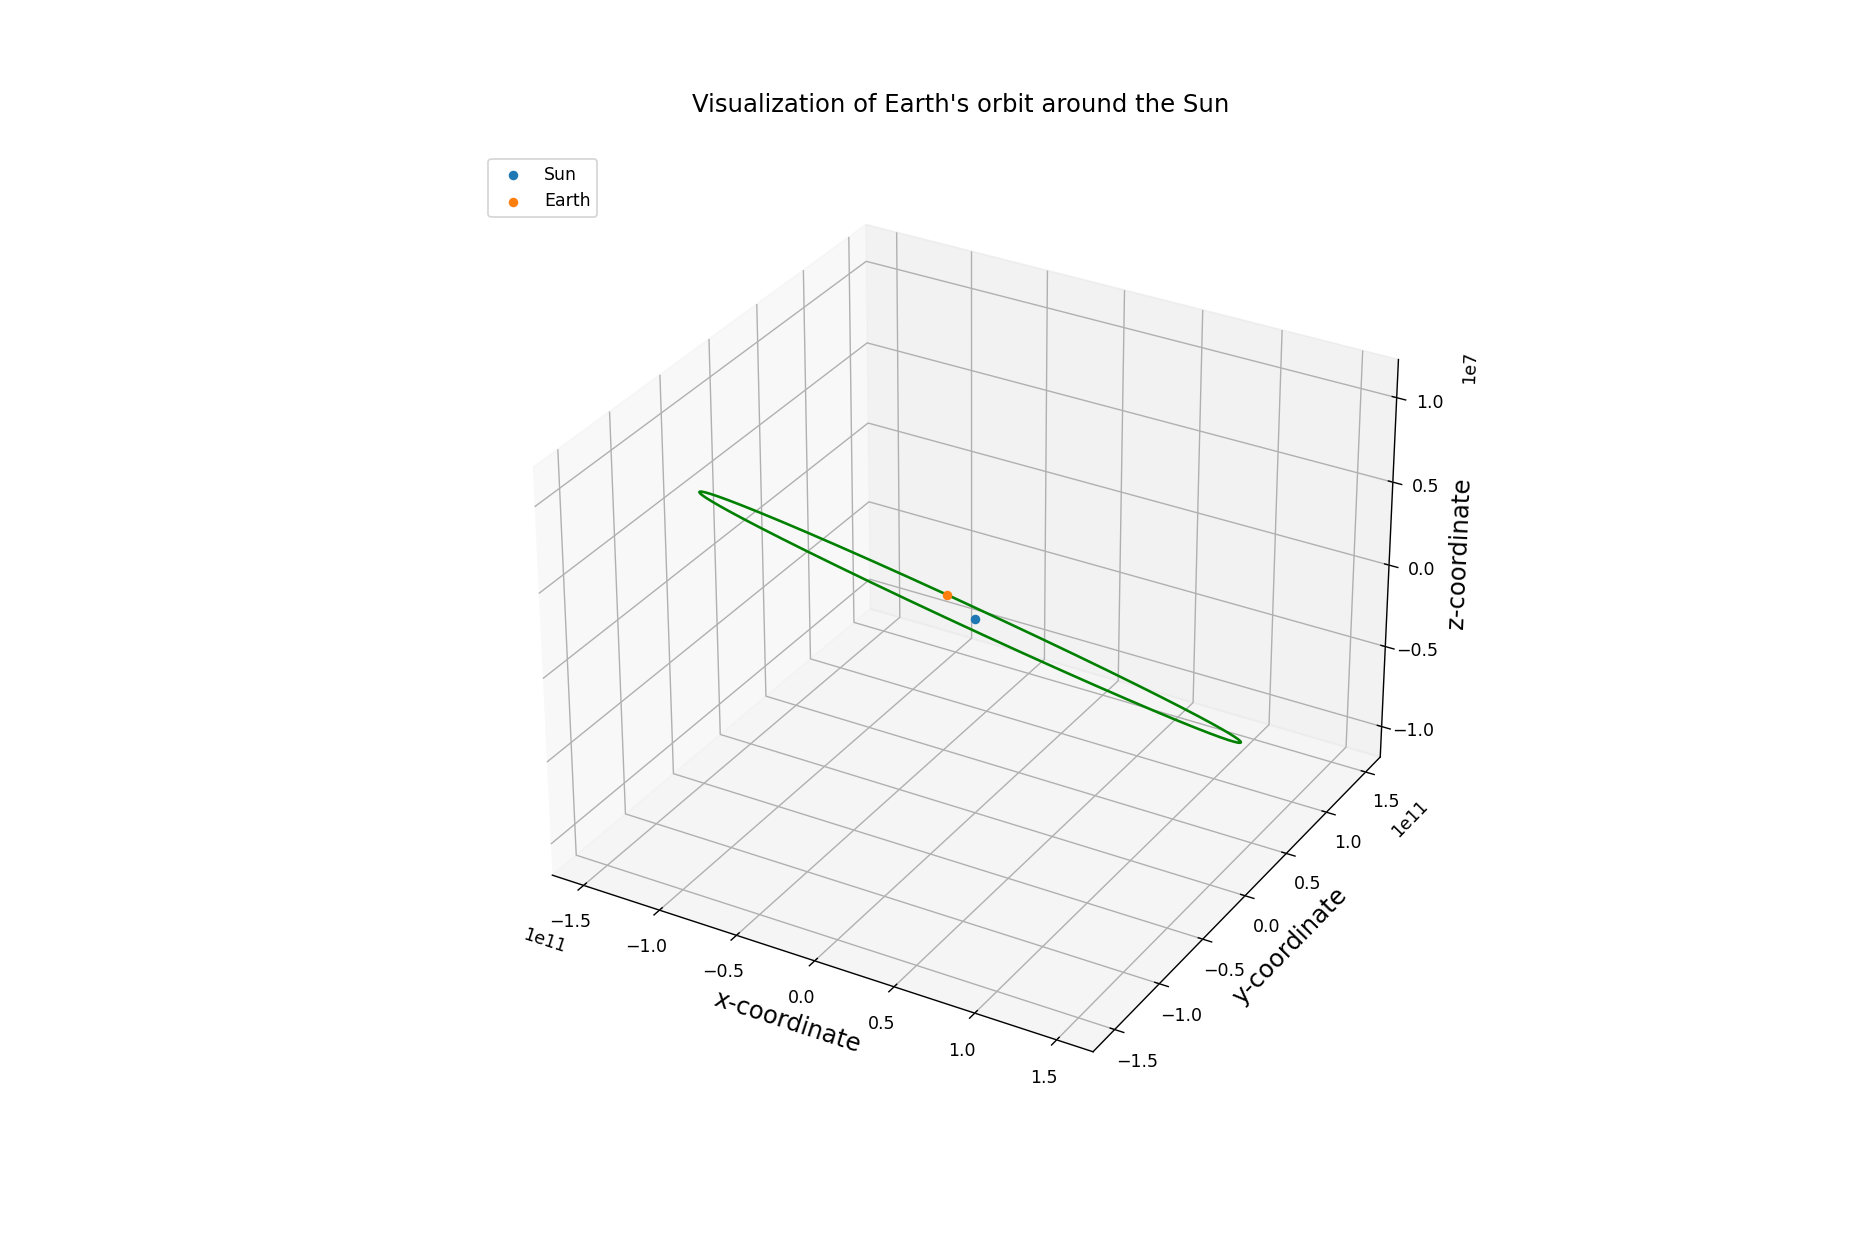

In [5]:
# Plotting the orbits
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(sun_positions[:, 0], sun_positions[:, 1], sun_positions[:, 2], color="red")
ax.plot(earth_positions[:, 0], earth_positions[:, 1], earth_positions[:, 2], color="green")
ax.scatter(sun_positions[-1, 0], sun_positions[-1, 1], sun_positions[-1, 2], marker="o", label="Sun")
ax.scatter(earth_positions[-1, 0], earth_positions[-1, 1], earth_positions[-1, 2], marker="o", label="Earth")

ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of Earth's orbit around the Sun\n", fontsize=14)
ax.legend(loc="upper left")
plt.show()
plt.savefig("Q1_earth_around_sun.png", dpi=300, bbox_inches="tight")

<IPython.core.display.Javascript object>


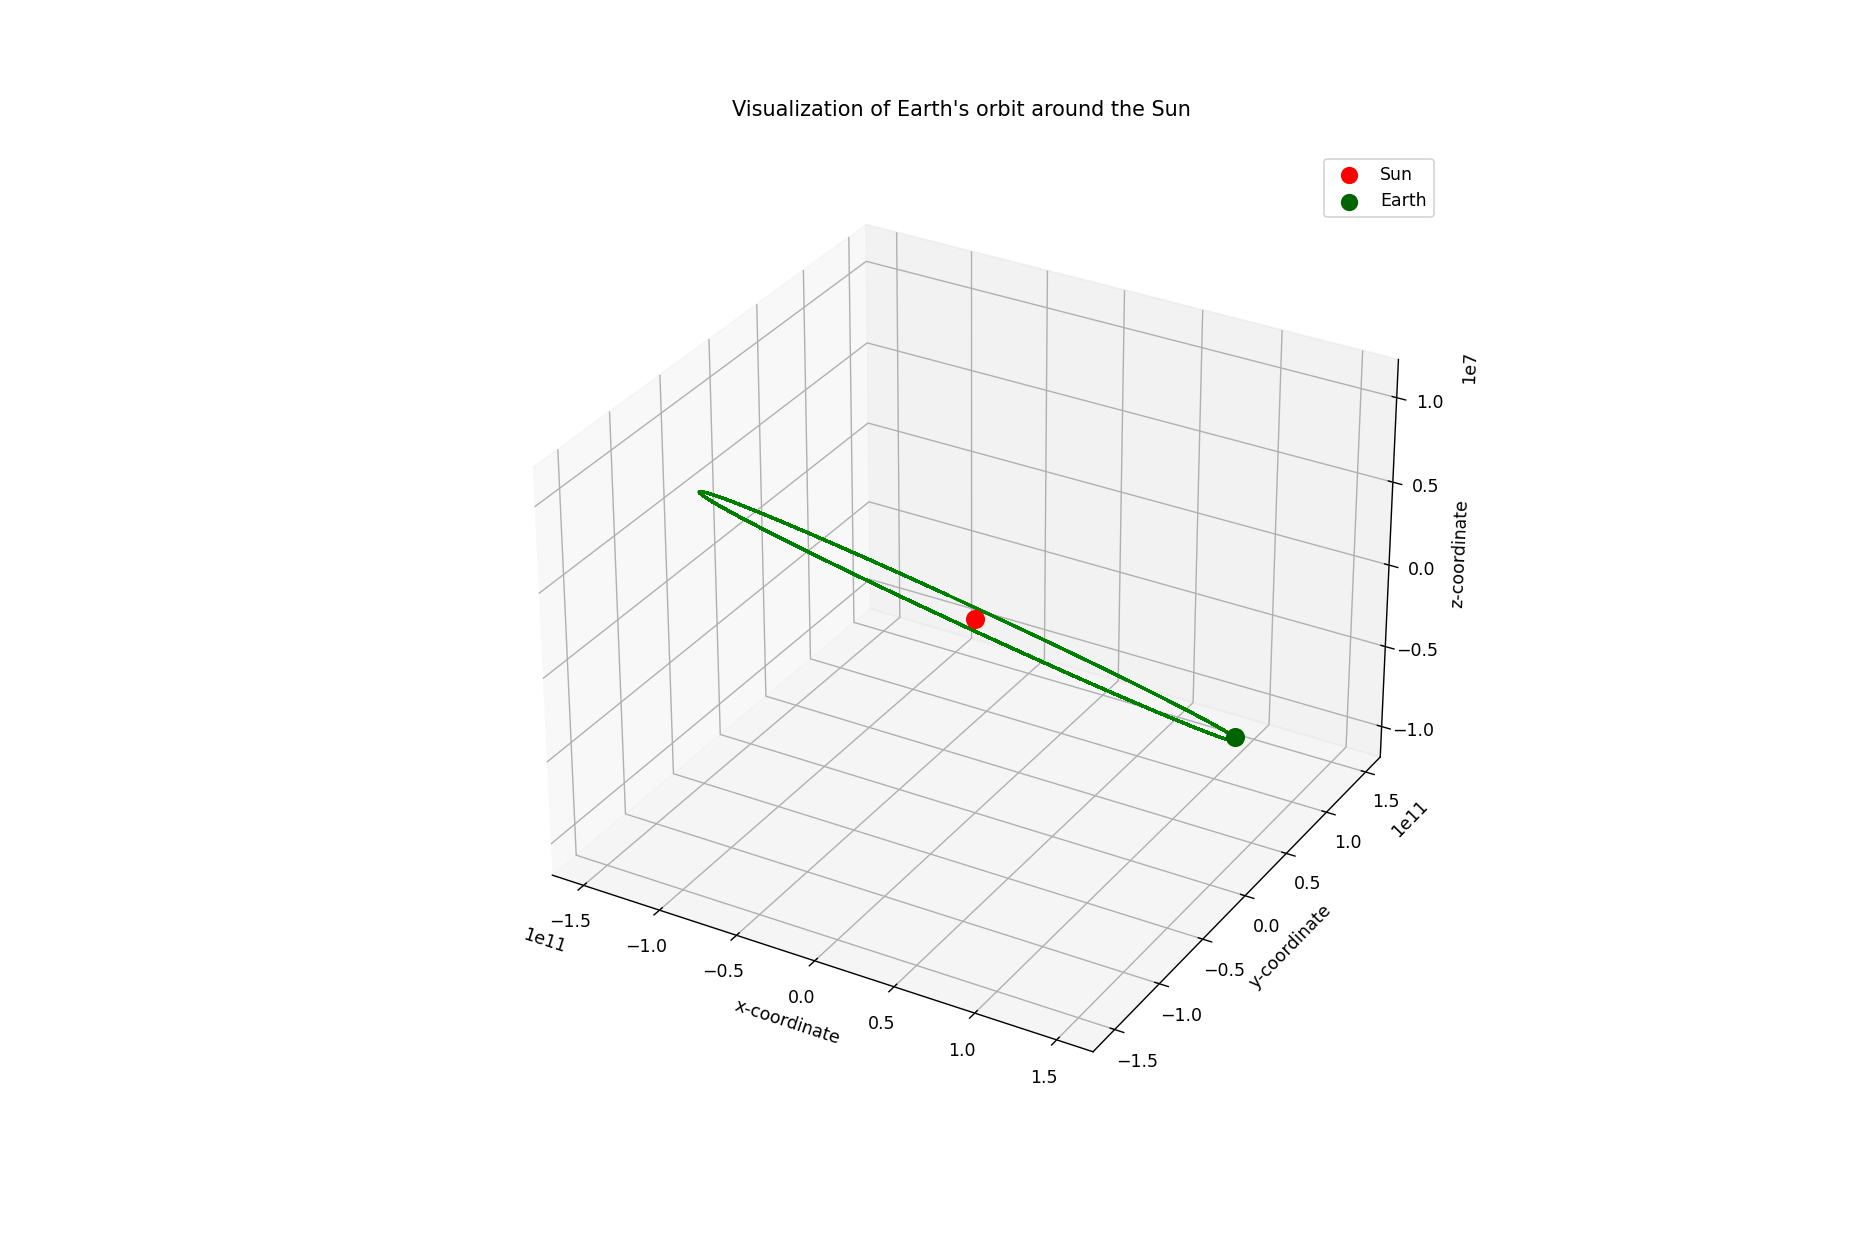

In [6]:
# Animation setup
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection="3d")
sun_marker = [ax.scatter(sun_positions[0, 0], sun_positions[0, 1], sun_positions[0, 2], color="red", marker="o", s=80, label="Sun")]
earth_marker = [ax.scatter(earth_positions[0, 0], earth_positions[0, 1], earth_positions[0, 2], color="darkgreen", marker="o", s=80, label="Earth")]

def update_frame(i, sun_marker, earth_marker):
    sun_marker[0].remove()
    earth_marker[0].remove()

    ax.plot(sun_positions[:i, 0], sun_positions[:i, 1], sun_positions[:i, 2], color="red")
    ax.plot(earth_positions[:i, 0], earth_positions[:i, 1], earth_positions[:i, 2], color="green")

    sun_marker[0] = ax.scatter(sun_positions[i - 1, 0], sun_positions[i - 1, 1], sun_positions[i - 1, 2], color="red", marker="o", s=100)
    earth_marker[0] = ax.scatter(earth_positions[i - 1, 0], earth_positions[i - 1, 1], earth_positions[i - 1, 2], color="darkgreen", marker="o", s=100)

    return sun_marker, earth_marker

ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.set_zlabel("z-coordinate")
ax.set_title("Visualization of Earth's orbit around the Sun\n")
ax.legend()

anim = animation.FuncAnimation(fig, update_frame, frames=1000, interval=2, repeat=True, blit=False, fargs=(sun_marker, earth_marker))
plt.show()
anim.save('Q1_earth_around_sun.gif', writer='pillow')

## 2. What happens to the Earth's orbital motion if you add the rest of the planets (without Earth's moon) vs. if you add just the Earth's moon? [5 points] 

### a) Sun-Earth-Moon system

In [7]:
%reset -f
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib notebook

In [8]:

# Constants
G = 6.67430e-11  # Gravitational constant
M_sun = 1.989e30  # Mass of the Sun (kg)
M_earth = 5.972e24  # Mass of the Earth (kg)
M_moon = 7.34767309e+22 # Mass of Mon (kg)

# Initial conditions
pos_sun = np.array([0, 0, 0])
vel_sun = np.array([0, 0, 0])
pos_earth = np.array([-8.697057015299645E+10, 1.188738543717089E+11, -6.455870720483363E+06])
vel_earth = np.array([-2.451782463229322E+04, -1.769234812356168E+04, 1.659193200505449E+0])
pos_moon = np.array([-8.727926515502936E+10, 1.191320887804982E+11 ,2.348533049859107E+07])  # Initial position of the Moon
vel_moon = np.array([-2.516279498982180E+04 ,-1.842682040848079E+04 ,-4.221700461063893E+01])  # Initial velocity of the Moon
initial_pos_earth = pos_earth.copy()


mindist = 1e18

Time period of Earth in Sun-Earth-Moon system is 31563118.906505264 seconds


<IPython.core.display.Javascript object>


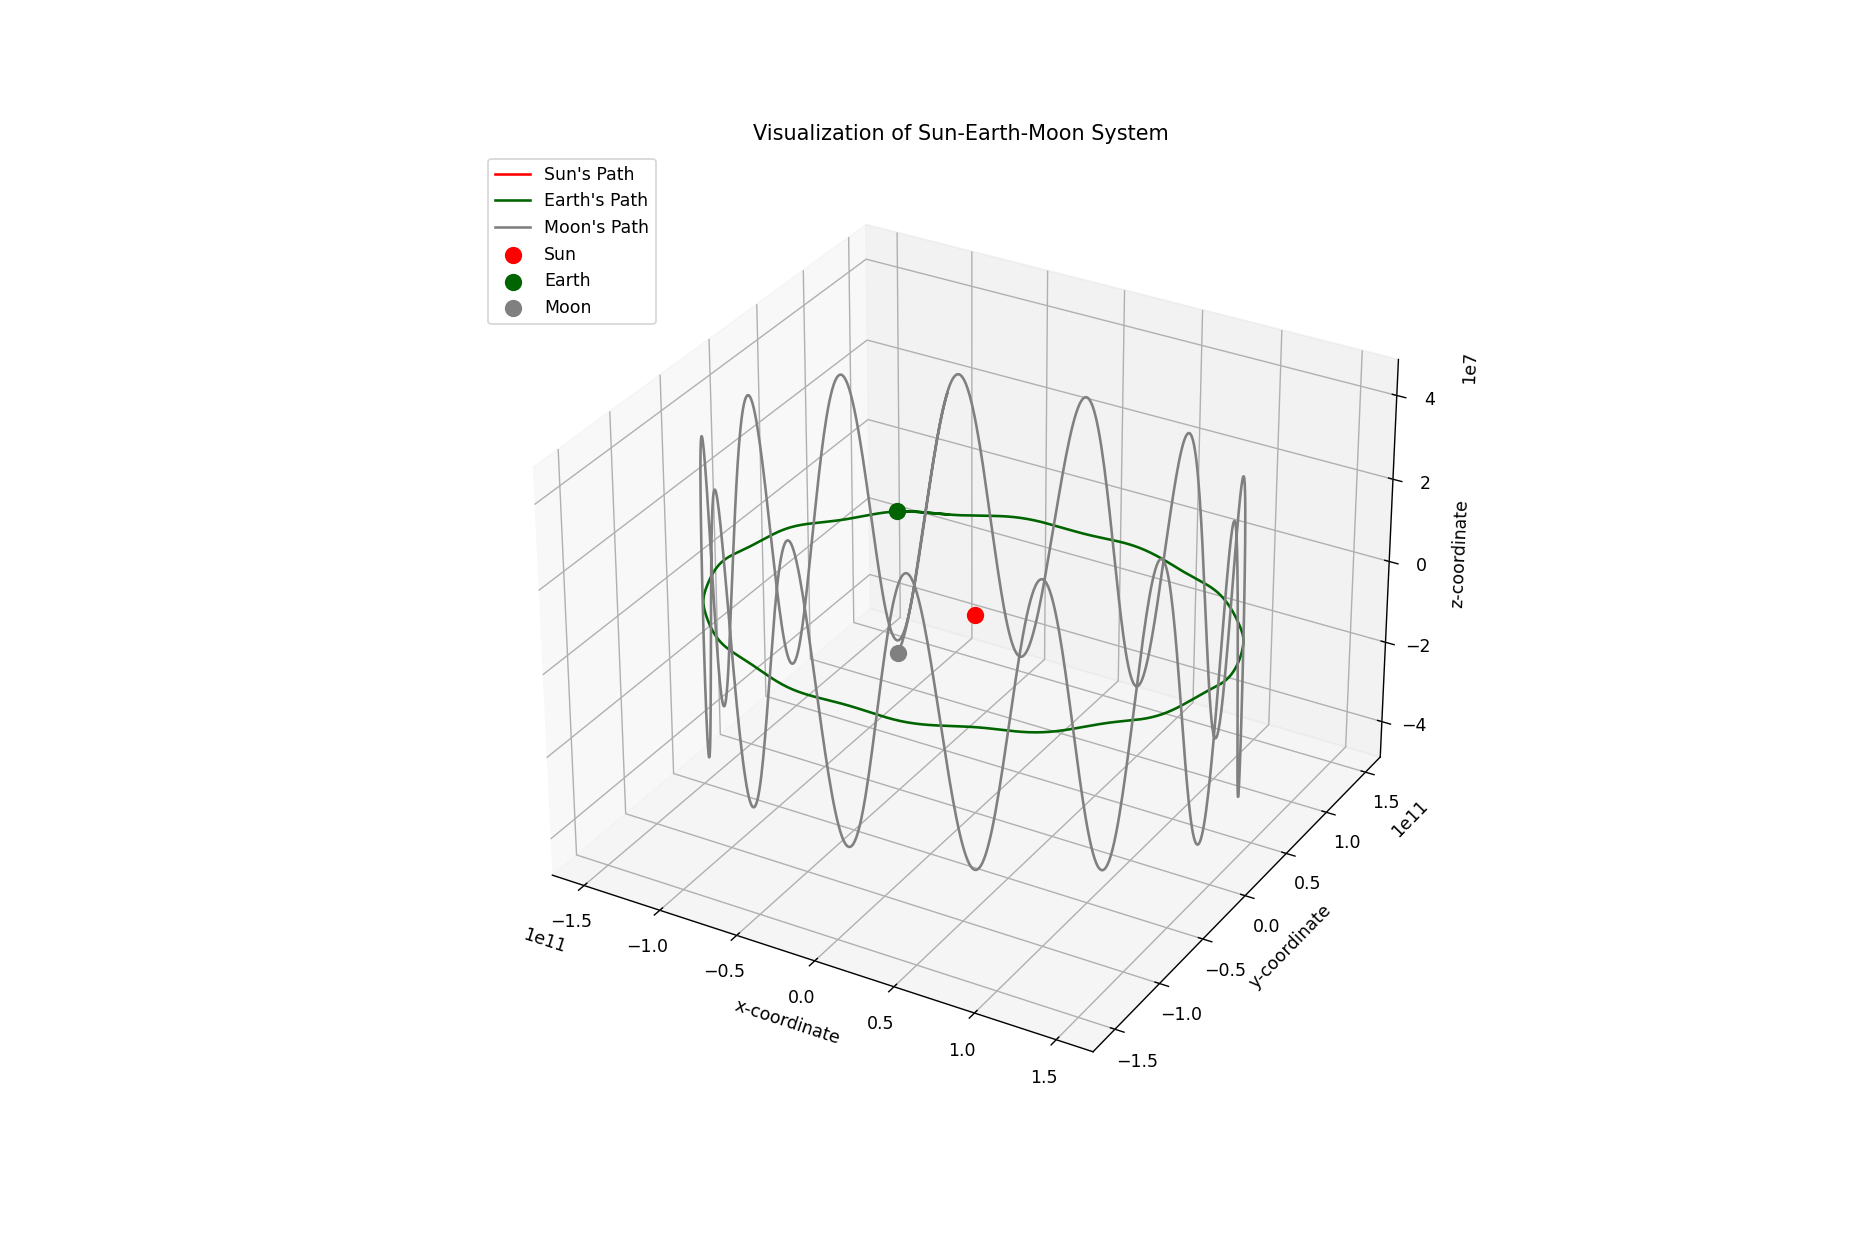

In [9]:
init_params=np.array([pos_sun,pos_earth,pos_moon,vel_sun,vel_earth,vel_moon]) #Package initial parameters into one size-18 array
init_params=init_params.flatten() #Flatten the array to make it 1D
time_span=np.linspace(0,32536000,1000) #Time span is 20 orbital years and 1000 points


def ThreeBodyEquations(t, w, G, m1, m2, m3):
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    v1 = w[9:12]
    v2 = w[12:15]
    v3 = w[15:18]

    # Distances
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)

    # Minimum distance calculation
    global mindist
#     middist = 1e18 ##########################################################################################
    global time_earth_moon
    if np.linalg.norm(r2 - initial_pos_earth) < mindist and t > 1e6:
        mindist = np.linalg.norm(r2 - initial_pos_earth)
        time_earth_moon = t

    # Accelerations
    dv1bydt = G * m2 * (r2 - r1) / r12**3 + G * m3 * (r3 - r1) / r13**3
    dv2bydt = G * m1 * (r1 - r2) / r12**3 + G * m3 * (r3 - r2) / r23**3
    dv3bydt = G * m1 * (r1 - r3) / r13**3 + G * m2 * (r2 - r3) / r23**3

    dr1bydt = v1
    dr2bydt = v2
    dr3bydt = v3

    # Combine derivatives into a single array
    return np.concatenate((dr1bydt, dr2bydt, dr3bydt, dv1bydt, dv2bydt, dv3bydt))

# Solve the system with the Moon included
ivp_solution = solve_ivp(
    fun=ThreeBodyEquations,
    t_span=(time_span[0], time_span[-1]), 
    y0=init_params,
    args=(G, M_sun, M_earth, M_moon),  # Added Moon's mass
    t_eval=time_span,
    method='RK23',
    dense_output=True
)

three_body_sol = ivp_solution.y.T

# Extract positions
r1_sol = three_body_sol[:, :3]
r2_sol = three_body_sol[:, 3:6]
r3_sol = three_body_sol[:, 6:9]

print(f"Time period of Earth in Sun-Earth-Moon system is {time_earth_moon} seconds")

# Plot the orbits
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="red", label="Sun's Path")
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="darkgreen", label="Earth's Path")
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color="grey", label="Moon's Path")
ax.scatter(r1_sol[-1, 0], r1_sol[-1, 1], r1_sol[-1, 2], marker="o", s=80, color="red", label="Sun")
ax.scatter(r2_sol[-1, 0], r2_sol[-1, 1], r2_sol[-1, 2], marker="o", s=80, color="darkgreen", label="Earth")
ax.scatter(r3_sol[-1, 0], r3_sol[-1, 1], r3_sol[-1, 2], marker="o", s=80, color="grey", label="Moon")

ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.set_zlabel("z-coordinate")
ax.set_title("Visualization of Sun-Earth-Moon System")
ax.legend(loc="upper left")
plt.show()
plt.savefig("Q2_a_earth_moon_sun.png", dpi=300, bbox_inches="tight")

<IPython.core.display.Javascript object>


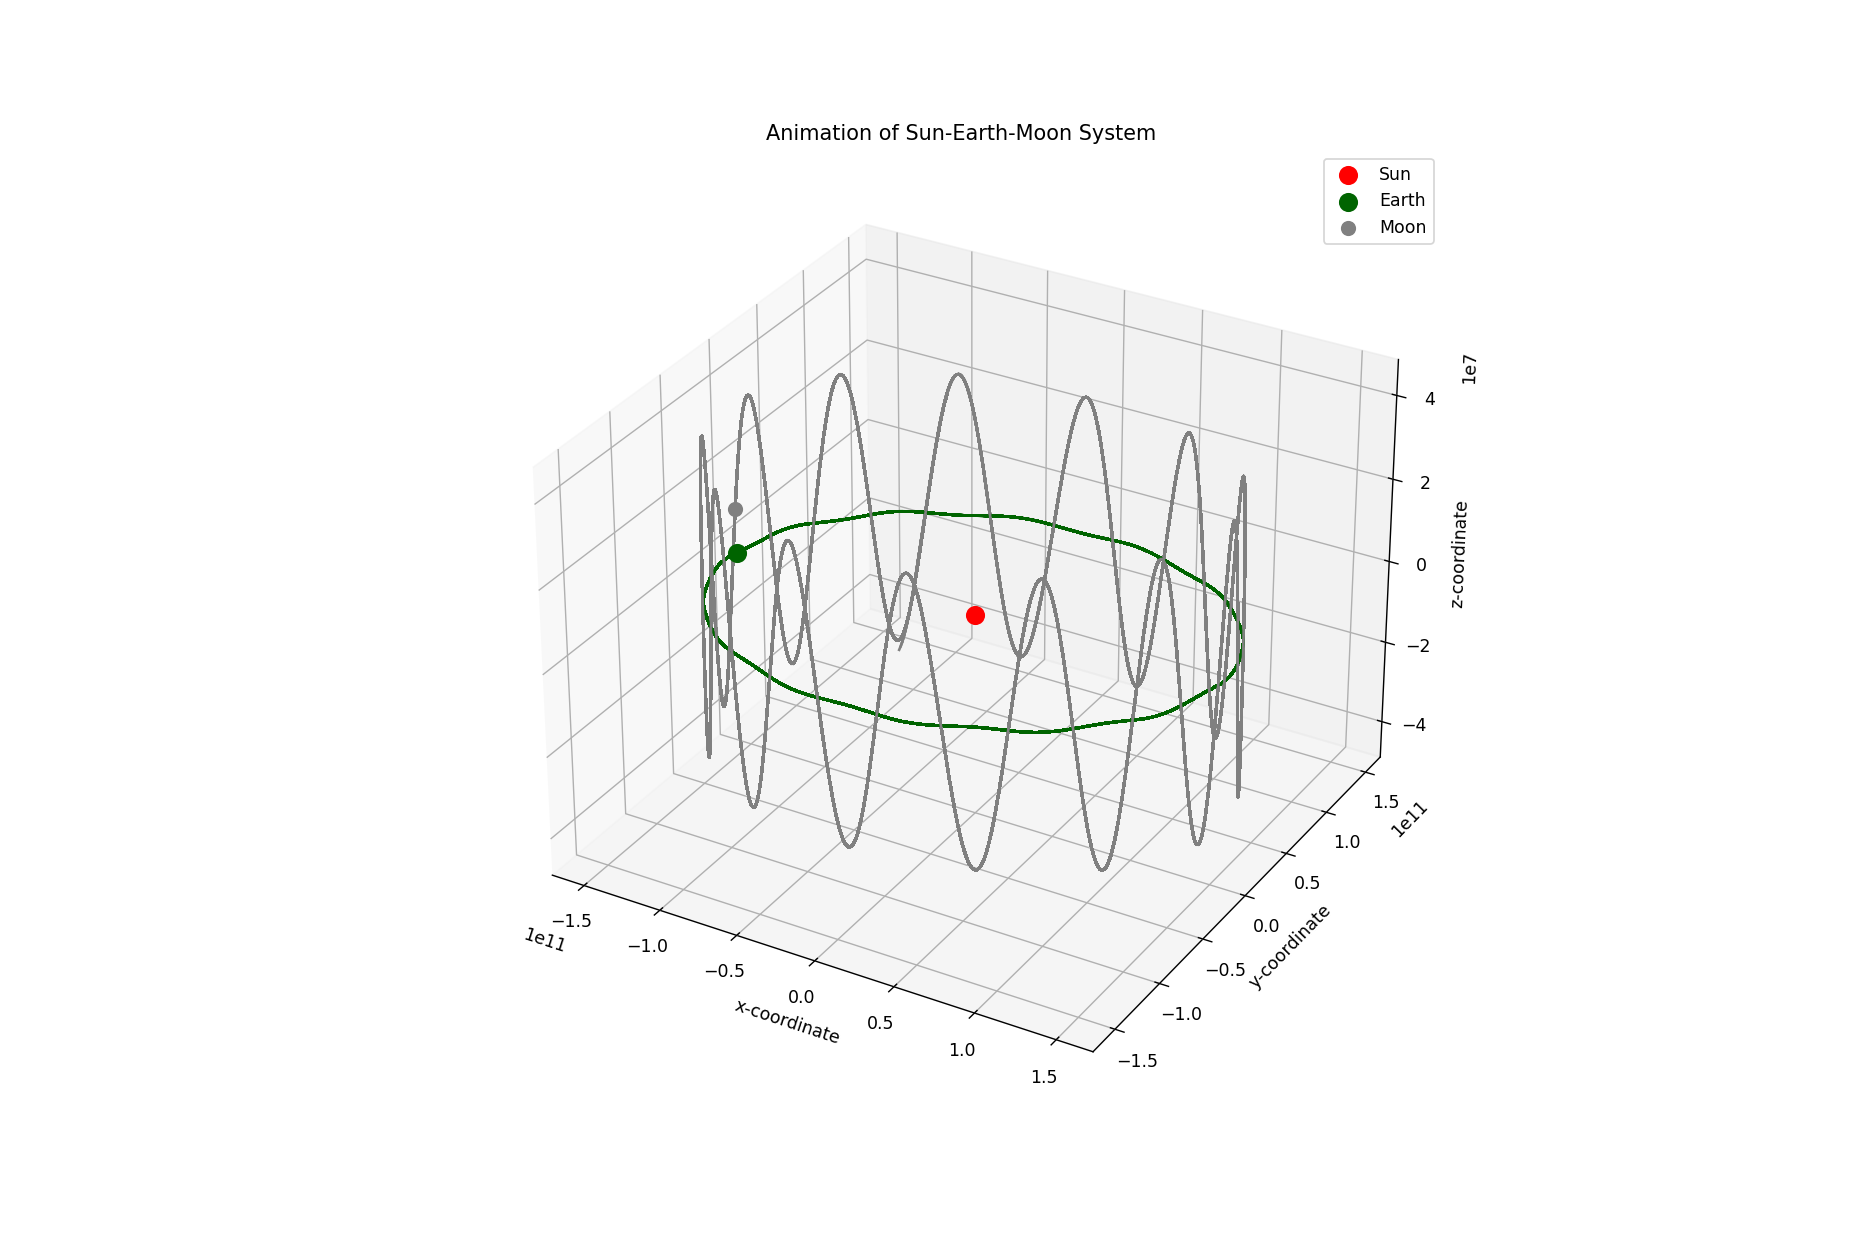

In [12]:
# Animation setup
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")

# Initial markers
sun_marker = [ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color="red", marker="o", s=100, label="Sun")]
earth_marker = [ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color="darkgreen", marker="o", s=100, label="Earth")]
moon_marker = [ax.scatter(r3_sol[0, 0], r3_sol[0, 1], r3_sol[0, 2], color="grey", marker="o", s=60, label="Moon")]

def update_frame(i, sun_marker, earth_marker, moon_marker):
    sun_marker[0].remove()
    earth_marker[0].remove()
    moon_marker[0].remove()

    # Update the plot with the new positions
    sun_marker[0] = ax.scatter(r1_sol[i, 0], r1_sol[i, 1], r1_sol[i, 2], color="red", marker="o", s=100)
    earth_marker[0] = ax.scatter(r2_sol[i, 0], r2_sol[i, 1], r2_sol[i, 2], color="darkgreen", marker="o", s=100)
    moon_marker[0] = ax.scatter(r3_sol[i, 0], r3_sol[i, 1], r3_sol[i, 2], color="grey", marker="o", s=60)

    # Plot the orbits
    ax.plot(r1_sol[:i, 0], r1_sol[:i, 1], r1_sol[:i, 2], color="red")
    ax.plot(r2_sol[:i, 0], r2_sol[:i, 1], r2_sol[:i, 2], color="darkgreen")
    ax.plot(r3_sol[:i, 0], r3_sol[:i, 1], r3_sol[:i, 2], color="grey")

    return sun_marker, earth_marker, moon_marker

ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.set_zlabel("z-coordinate")
ax.set_title("Animation of Sun-Earth-Moon System")
ax.legend()

anim = animation.FuncAnimation(fig, update_frame, frames=len(time_span), interval=2, repeat=True, blit=False, fargs=(sun_marker, earth_marker, moon_marker))
plt.show()
anim.save('Q2_a_earth_moon_sun.gif', writer='pillow')

### b) Sun-Earth and other planets (excluding moon)
Note: Only some planets have been taken to ease the calculations (Mars Venus, Jupiter)

Time period of Earth in Sun-Earth-Mars-Venus-Jupiter System is 32536000.0 seconds


<IPython.core.display.Javascript object>


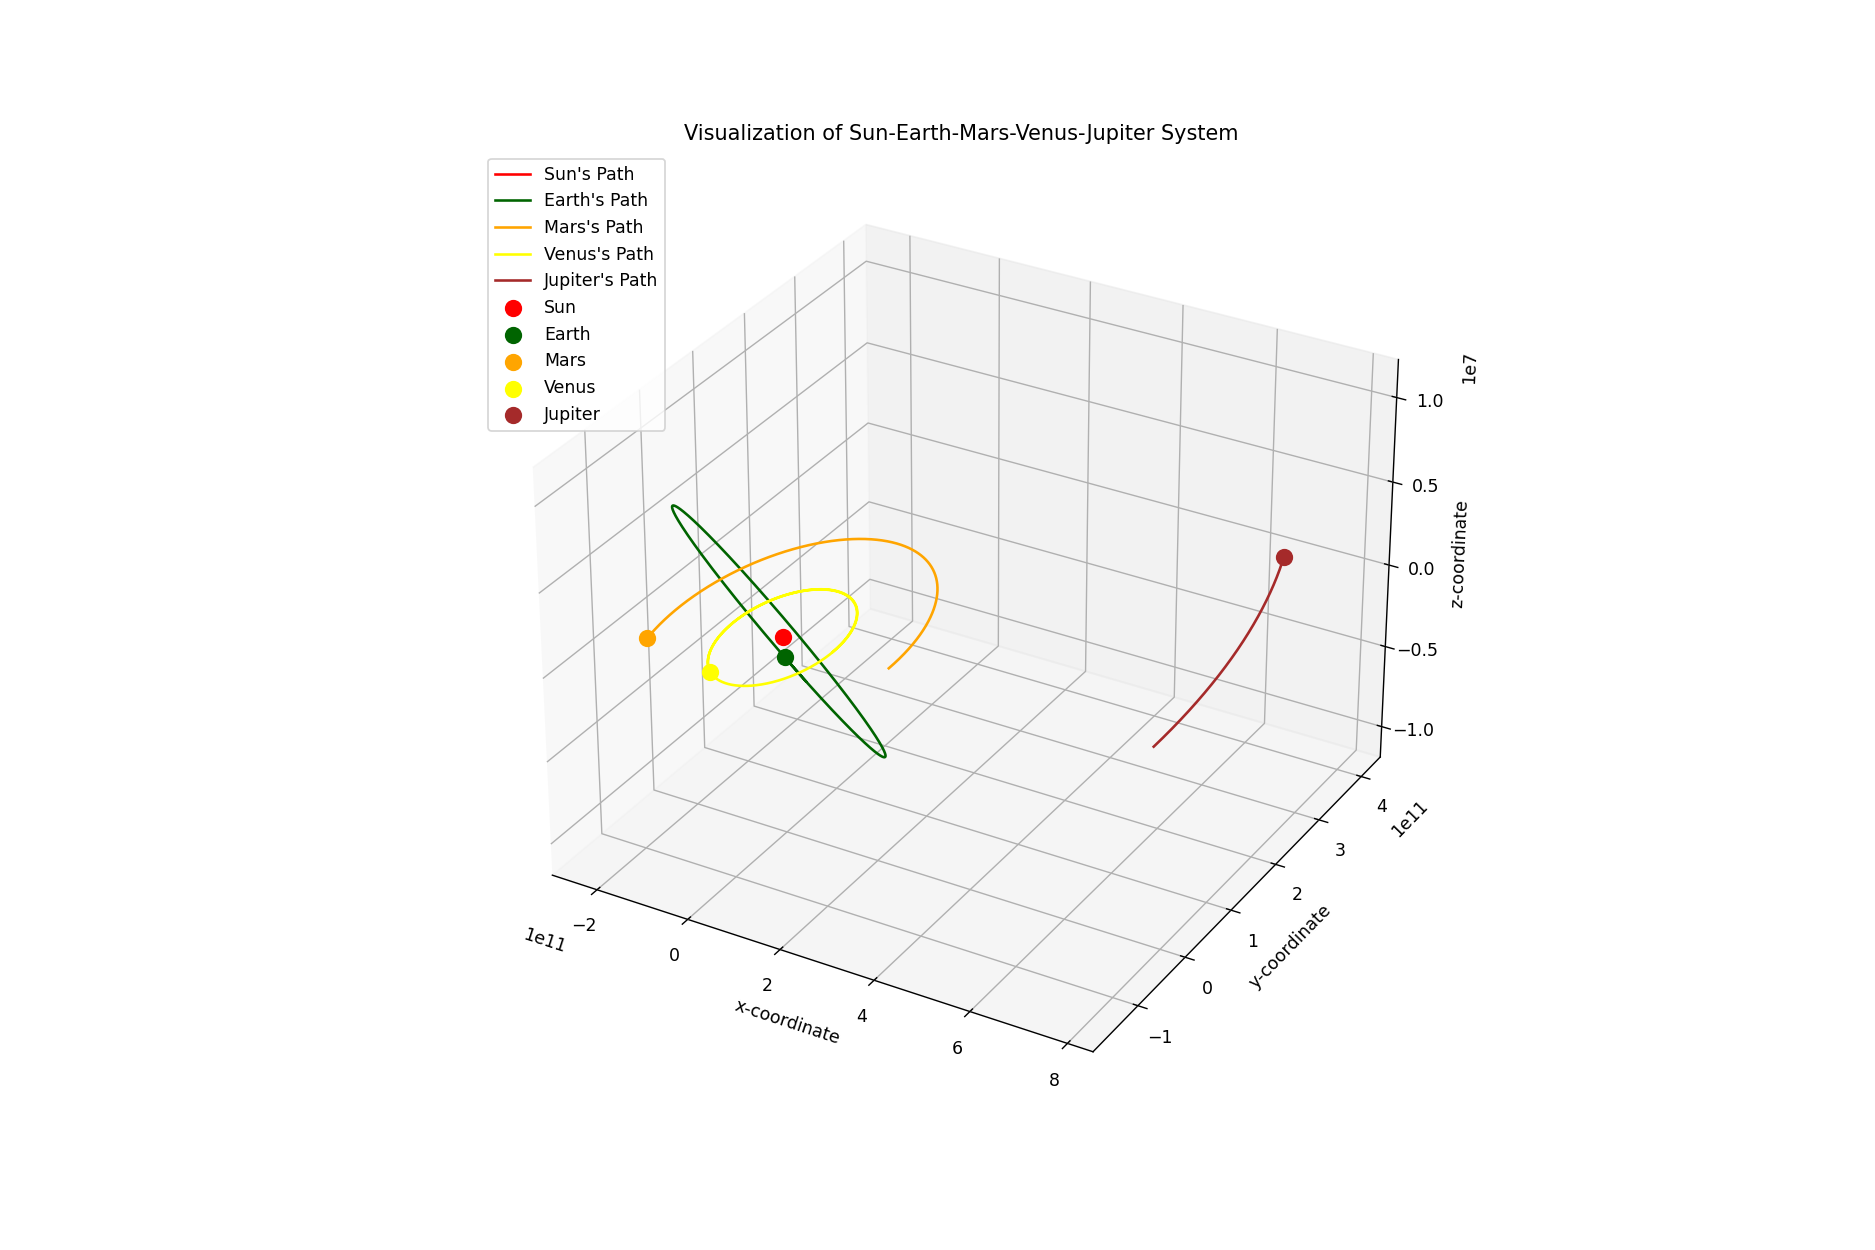

In [13]:
%reset -f
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib notebook

# Constants
G = 6.67430e-11  # Gravitational constant
M_sun = 1.989e30  # Mass of the Sun (kg)
M_earth = 5.972e24  # Mass of the Earth (kg)
M_mars = 6.4171e23  # Mass of Mars (kg)
M_venus = 4.8675e24  # Mass of Venus (kg)
M_jupiter = 1.8982e27  # Mass of Jupiter (kg)

# Initial positions and velocities
pos_sun = np.array([0, 0, 0])
vel_sun = np.array([0, 0, 0])
pos_earth = np.array([-8.697057015299645E+10, 1.188738543717089E+11, -6.455870720483363E+06])
vel_earth = np.array([-2.451782463229322E+04, -1.769234812356168E+04, 1.659193200505449E+0])

pos_mars = np.array([2.2794e11, 0, 0])  # Initial position of Mars
vel_mars = np.array([0, 2.41e4, 0])  # Initial velocity of Mars

pos_venus = np.array([1.082e11, 0, 0])  # Initial position of Venus
vel_venus = np.array([0, 3.50e4, 0])  # Initial velocity of Venus

pos_jupiter = np.array([7.785e11, 0, 0])  # Initial position of Jupiter
vel_jupiter = np.array([0, 1.31e4, 0])  # Initial velocity of Jupiter


initial_pos_earth = pos_earth.copy()
# Initial conditions packaged into one size-18 array (for 5 bodies: Sun, Earth, Mars, Venus, Jupiter)
init_params = np.array([pos_sun, pos_earth, pos_mars, pos_venus, pos_jupiter, vel_sun, vel_earth, vel_mars, vel_venus, vel_jupiter])
init_params = init_params.flatten()  # Flatten the array to make it 1D

time_span = np.linspace(0, 32536000, 1000)  # Time span is 20 orbital years and 1000 points

def NBodyEquations(t, w, G, m1, m2, m3, m4, m5):
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    r4 = w[9:12]
    r5 = w[12:15]
    v1 = w[15:18]
    v2 = w[18:21]
    v3 = w[21:24]
    v4 = w[24:27]
    v5 = w[27:30]

    # Distances
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r14 = np.linalg.norm(r4 - r1)
    r15 = np.linalg.norm(r5 - r1)
    r23 = np.linalg.norm(r3 - r2)
    r24 = np.linalg.norm(r4 - r2)
    r25 = np.linalg.norm(r5 - r2)
    r34 = np.linalg.norm(r4 - r3)
    r35 = np.linalg.norm(r5 - r3)
    r45 = np.linalg.norm(r5 - r4)
    
    # Minimum distance calculation
    min_dist = 1e18
    global time_earth_planets
    if np.linalg.norm(r2 - initial_pos_earth) < min_dist and t > 1e6:
        min_dist = np.linalg.norm(r2 - initial_pos_earth)
        time_earth_planets = t

    # Accelerations
    dv1bydt = G * m2 * (r2 - r1) / r12**3 + G * m3 * (r3 - r1) / r13**3 + G * m4 * (r4 - r1) / r14**3 + G * m5 * (r5 - r1) / r15**3
    dv2bydt = G * m1 * (r1 - r2) / r12**3 + G * m3 * (r3 - r2) / r23**3 + G * m4 * (r4 - r2) / r24**3 + G * m5 * (r5 - r2) / r25**3
    dv3bydt = G * m1 * (r1 - r3) / r13**3 + G * m2 * (r2 - r3) / r23**3 + G * m4 * (r4 - r3) / r34**3 + G * m5 * (r5 - r3) / r35**3
    dv4bydt = G * m1 * (r1 - r4) / r14**3 + G * m2 * (r2 - r4) / r24**3 + G * m3 * (r3 - r4) / r34**3 + G * m5 * (r5 - r4) / r45**3
    dv5bydt = G * m1 * (r1 - r5) / r15**3 + G * m2 * (r2 - r5) / r25**3 + G * m3 * (r3 - r5) / r35**3 + G * m4 * (r4 - r5) / r45**3

    # Derivatives of positions
    dr1bydt = v1
    dr2bydt = v2
    dr3bydt = v3
    dr4bydt = v4
    dr5bydt = v5

    # Combine derivatives into a single array
    return np.concatenate((dr1bydt, dr2bydt, dr3bydt, dr4bydt, dr5bydt, dv1bydt, dv2bydt, dv3bydt, dv4bydt, dv5bydt))

# Solve the system with the five bodies
ivp_solution = solve_ivp(
    fun=NBodyEquations,
    t_span=(time_span[0], time_span[-1]),
    y0=init_params,
    args=(G, M_sun, M_earth, M_mars, M_venus, M_jupiter),  # Added new planets
    t_eval=time_span,
    method='RK23',
    dense_output=True
)

# Extract positions
five_body_sol = ivp_solution.y.T
r1_sol = five_body_sol[:, :3]
r2_sol = five_body_sol[:, 3:6]
r3_sol = five_body_sol[:, 6:9]
r4_sol = five_body_sol[:, 9:12]
r5_sol = five_body_sol[:, 12:15]

print(f"Time period of Earth in Sun-Earth-Mars-Venus-Jupiter System is {time_earth_planets} seconds")

# Plot the orbits
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="red", label="Sun's Path")
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="darkgreen", label="Earth's Path")
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color="orange", label="Mars's Path")
ax.plot(r4_sol[:, 0], r4_sol[:, 1], r4_sol[:, 2], color="yellow", label="Venus's Path")
ax.plot(r5_sol[:, 0], r5_sol[:, 1], r5_sol[:, 2], color="brown", label="Jupiter's Path")

# Plot the planets
ax.scatter(r1_sol[-1, 0], r1_sol[-1, 1], r1_sol[-1, 2], marker="o", s=80, color="red", label="Sun")
ax.scatter(r2_sol[-1, 0], r2_sol[-1, 1], r2_sol[-1, 2], marker="o", s=80, color="darkgreen", label="Earth")
ax.scatter(r3_sol[-1, 0], r3_sol[-1, 1], r3_sol[-1, 2], marker="o", s=80, color="orange", label="Mars")
ax.scatter(r4_sol[-1, 0], r4_sol[-1, 1], r4_sol[-1, 2], marker="o", s=80, color="yellow", label="Venus")
ax.scatter(r5_sol[-1, 0], r5_sol[-1, 1], r5_sol[-1, 2], marker="o", s=80, color="brown", label="Jupiter")

ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.set_zlabel("z-coordinate")
ax.set_title("Visualization of Sun-Earth-Mars-Venus-Jupiter System")
ax.legend(loc="upper left")
plt.show()
plt.savefig("Q2_b_earth_planets_sun.png", dpi=300, bbox_inches="tight")

<IPython.core.display.Javascript object>


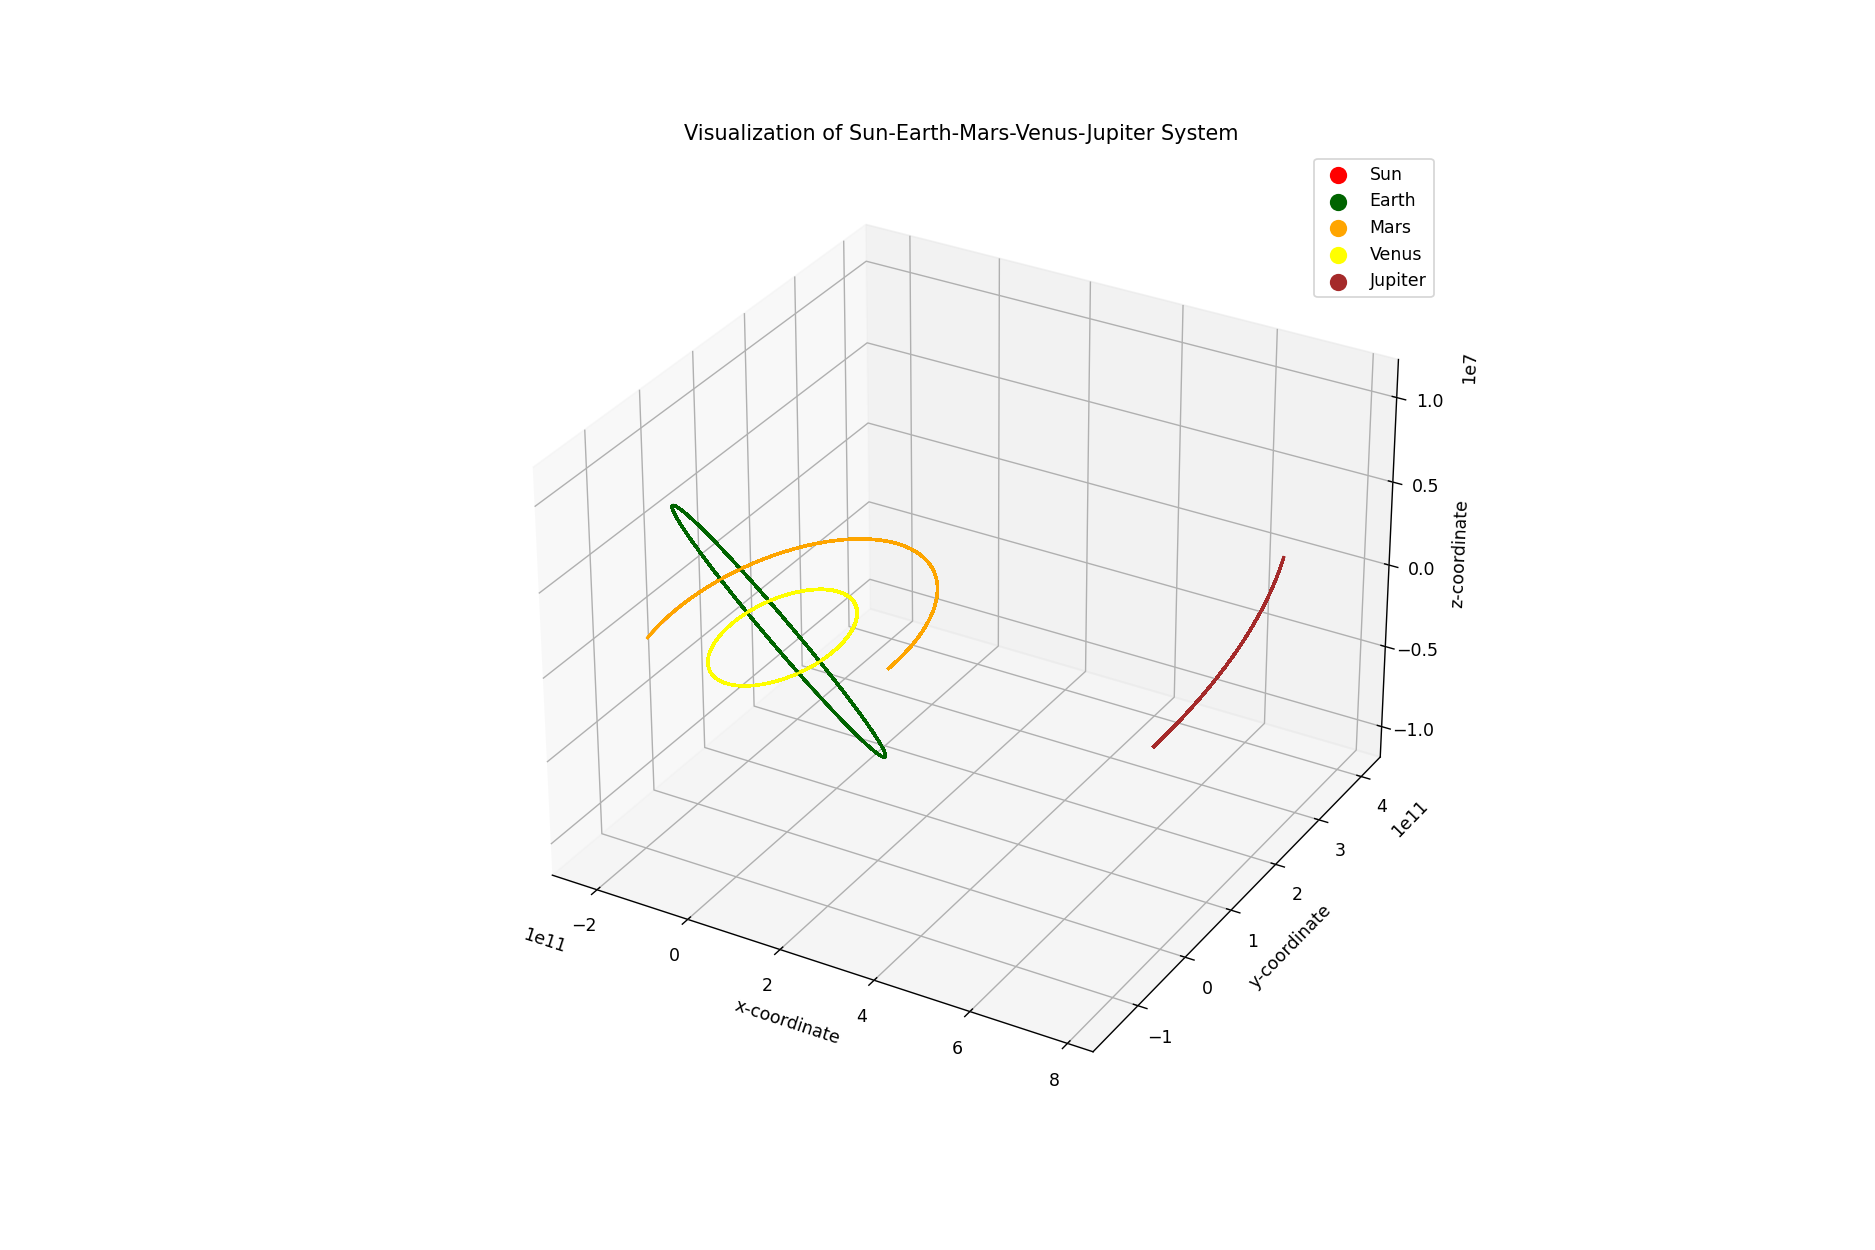

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [14]:
# Animation setup
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
sun_marker = [ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color="red", marker="o", s=80, label="Sun")]
earth_marker = [ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color="darkgreen", marker="o", s=80, label="Earth")]
mars_marker = [ax.scatter(r3_sol[0, 0], r3_sol[0, 1], r3_sol[0, 2], color="orange", marker="o", s=80, label="Mars")]
venus_marker = [ax.scatter(r4_sol[0, 0], r4_sol[0, 1], r4_sol[0, 2], color="yellow", marker="o", s=80, label="Venus")]
jupiter_marker = [ax.scatter(r5_sol[0, 0], r5_sol[0, 1], r5_sol[0, 2], color="brown", marker="o", s=80, label="Jupiter")]

def update_frame(i, sun_marker, earth_marker, mars_marker, venus_marker, jupiter_marker):
    sun_marker[0].remove()
    earth_marker[0].remove()
    mars_marker[0].remove()
    venus_marker[0].remove()
    jupiter_marker[0].remove()

    ax.plot(r1_sol[:i, 0], r1_sol[:i, 1], r1_sol[:i, 2], color="red")
    ax.plot(r2_sol[:i, 0], r2_sol[:i, 1], r2_sol[:i, 2], color="darkgreen")
    ax.plot(r3_sol[:i, 0], r3_sol[:i, 1], r3_sol[:i, 2], color="orange")
    ax.plot(r4_sol[:i, 0], r4_sol[:i, 1], r4_sol[:i, 2], color="yellow")
    ax.plot(r5_sol[:i, 0], r5_sol[:i, 1], r5_sol[:i, 2], color="brown")

    sun_marker[0] = ax.scatter(r1_sol[i - 1, 0], r1_sol[i - 1, 1], r1_sol[i - 1, 2], color="red", marker="o", s=100)
    earth_marker[0] = ax.scatter(r2_sol[i - 1, 0], r2_sol[i - 1, 1], r2_sol[i - 1, 2], color="darkgreen", marker="o", s=100)
    mars_marker[0] = ax.scatter(r3_sol[i - 1, 0], r3_sol[i - 1, 1], r3_sol[i - 1, 2], color="orange", marker="o", s=100)
    venus_marker[0] = ax.scatter(r4_sol[i - 1, 0], r4_sol[i - 1, 1], r4_sol[i - 1, 2], color="yellow", marker="o", s=100)
    jupiter_marker[0] = ax.scatter(r5_sol[i - 1, 0], r5_sol[i - 1, 1], r5_sol[i - 1, 2], color="brown", marker="o", s=100)

    return sun_marker, earth_marker, mars_marker, venus_marker, jupiter_marker

ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.set_zlabel("z-coordinate")
ax.set_title("Visualization of Sun-Earth-Mars-Venus-Jupiter System")
ax.legend()

anim = animation.FuncAnimation(fig, update_frame, frames=2000, interval=2, repeat=True, blit=False, fargs=(sun_marker, earth_marker, mars_marker, venus_marker, jupiter_marker))
plt.show()
anim.save('Q2_b_earth_planets_sun.gif', writer='pillow')

## 3. Plot the motion of the moon and earth on an earth-centered inertial and earth-fixed F.O.R.s [5 points]

### a) Earth-Centered Inertial Frame

In [1]:
%reset -f
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib notebook

<IPython.core.display.Javascript object>


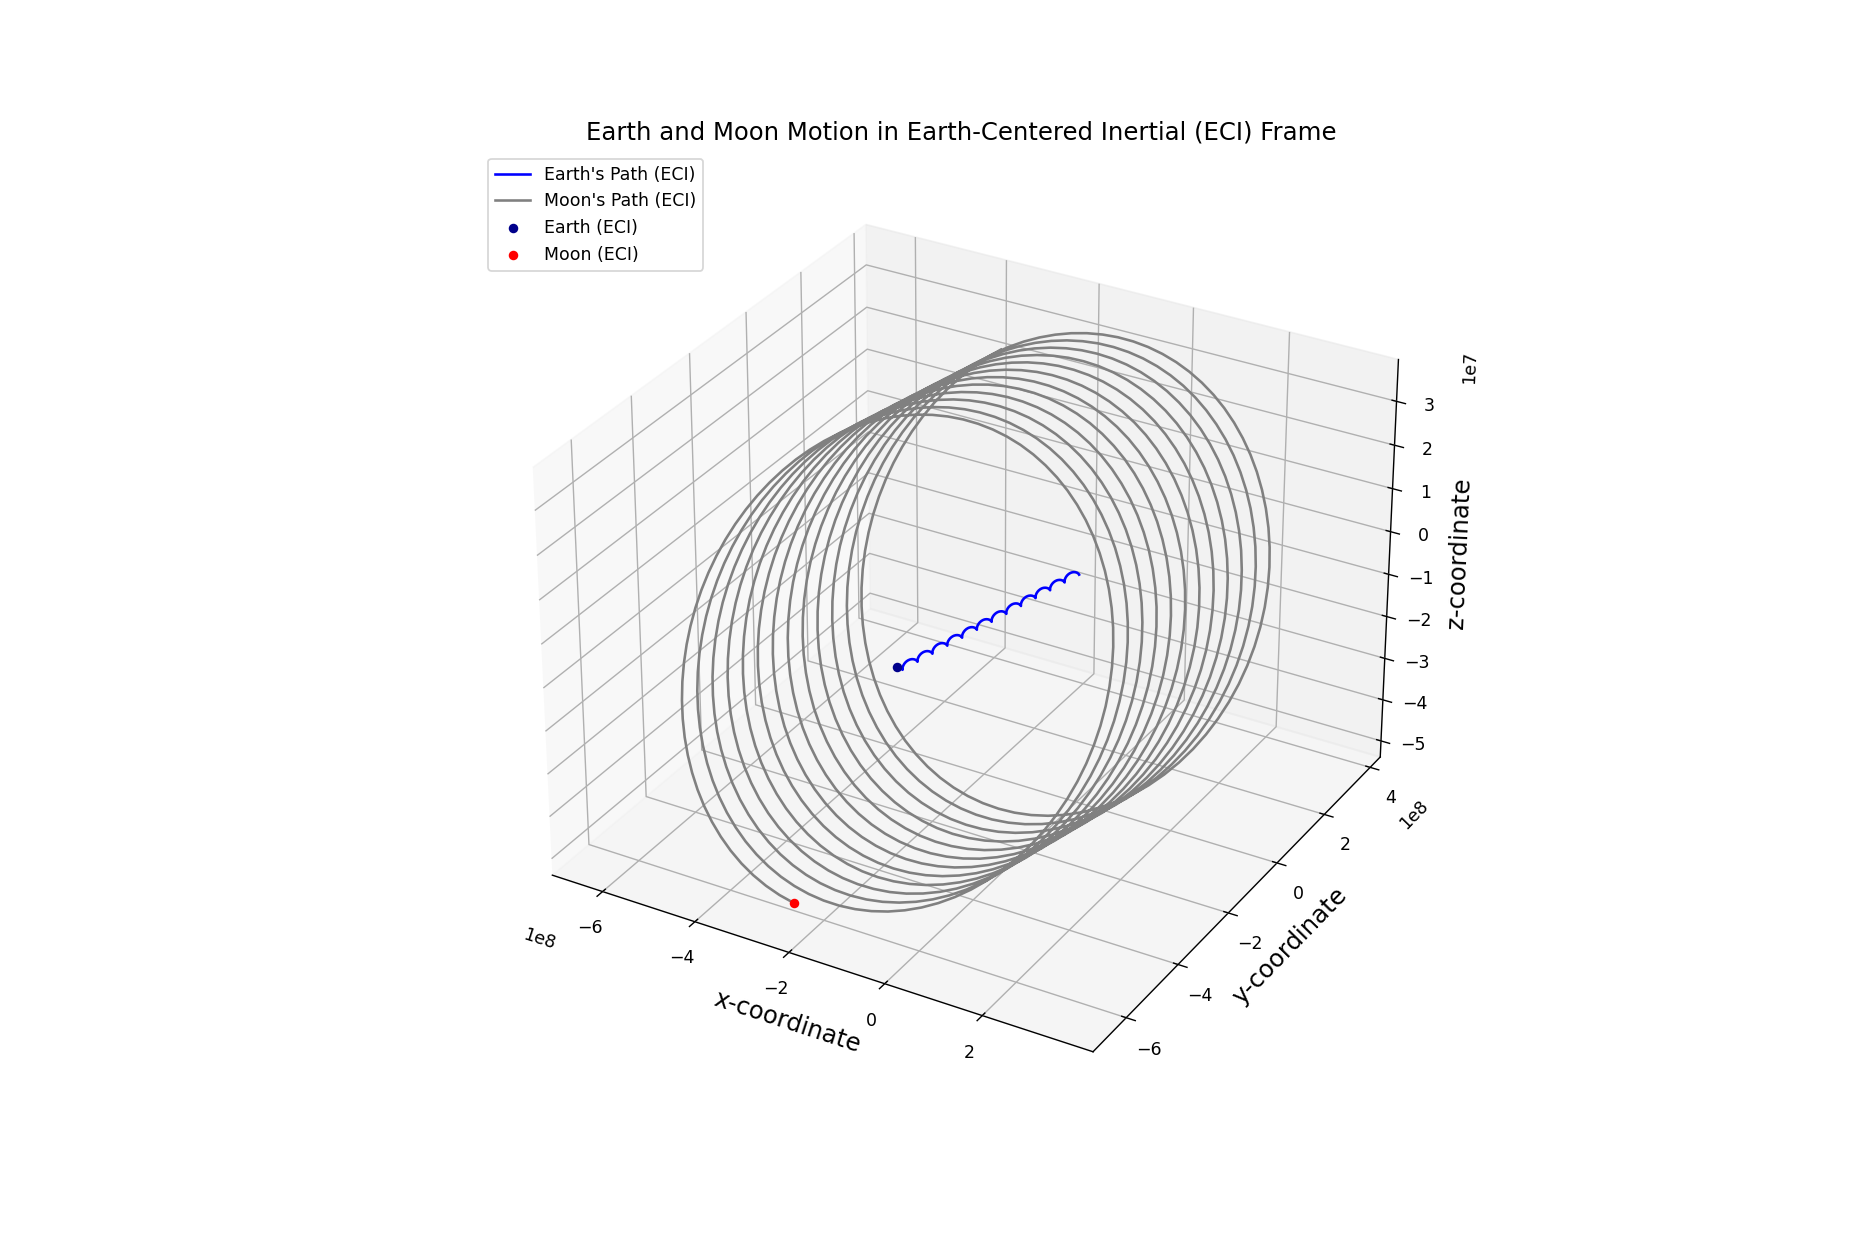

In [4]:
# Constants
G = 6.67384e-11  # Gravitational constant
M_moon = 7.347e+22  # Moon's mass (kg)
M_earth = 5.972e+24  # Earth's mass (kg)
pos_earth = np.array([0, 0, 0])  # Earth's initial position
pos_moon = np.array([-3.086950020329063E+08, 2.582344087893477E+08, 2.994120121907708E+07])  # Moon's initial position
vel_earth = np.array([0, 0, 0])  # Earth's initial velocity
vel_moon = np.array([-6.449703575285840E+02, -7.344722849191071E+02, -4.387619781114438E+01])  # Moon's initial velocity

# Center of mass (COM) of the Earth-Moon system
pos_com = (M_earth * pos_earth + M_moon * pos_moon) / (M_earth + M_moon)
vel_com = (M_earth * vel_earth + M_moon * vel_moon) / (M_earth + M_moon)


# Two-body system equations
def body_eqns(t, w, G, M_earth, M_moon):
    pos_earth, pos_moon = w[:3], w[3:6]
    vel_earth, vel_moon = w[6:9], w[9:12]
    
    dist = np.linalg.norm(pos_moon - pos_earth)  # Distance between Earth and Moon
    
    # Gravitational accelerations
    acc_earth = G * M_moon * (pos_moon - pos_earth) / dist**3
    acc_moon = G * M_earth * (pos_earth - pos_moon) / dist**3
    
    # Derivatives of position and velocity
    pos_dot_earth, pos_dot_moon = vel_earth, vel_moon
    vel_dot_earth, vel_dot_moon = acc_earth, acc_moon
    
    # Concatenate derivatives
    derivs = np.concatenate((pos_dot_earth, pos_dot_moon, vel_dot_earth, vel_dot_moon))
    return derivs

# Initial conditions: Flatten position and velocity arrays
init_conditions = np.array([pos_earth, pos_moon, vel_earth, vel_moon]).flatten()

# Time span for the simulation (30 days, with 1000 steps)
time_span = np.linspace(0, 30000000, 1000)

# Solve the system using ODE integrator
ivp_solution = solve_ivp(
    fun=body_eqns,
    t_span=(time_span[0], time_span[-1]),
    y0=init_conditions,
    args=(G, M_earth, M_moon),
    t_eval=time_span,
    method='RK23',  # You can choose a different method if needed
    dense_output=True
)

# Extract the solution
solution = ivp_solution.y.T

# Store the position solutions for Earth and Moon
earth_pos = solution[:, :3]
moon_pos = solution[:, 3:6]

# Plot the orbits in the Earth-Centered Inertial (ECI) frame
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(earth_pos[:, 0], earth_pos[:, 1], earth_pos[:, 2], color="blue", label="Earth's Path (ECI)")
ax.plot(moon_pos[:, 0], moon_pos[:, 1], moon_pos[:, 2], color="grey", label="Moon's Path (ECI)")

# Mark positions of Earth and Moon at the final time step
ax.scatter(earth_pos[-1, 0], earth_pos[-1, 1], earth_pos[-1, 2], marker="o", label="Earth (ECI)", color="darkblue")
ax.scatter(moon_pos[-1, 0], moon_pos[-1, 1], moon_pos[-1, 2], marker="o", label="Moon (ECI)", color="red")

ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Earth and Moon Motion in Earth-Centered Inertial (ECI) Frame", fontsize=14)
ax.legend(loc="upper left")

plt.show()
plt.savefig("Q3_a_ECI.png", dpi=300, bbox_inches="tight")


<IPython.core.display.Javascript object>


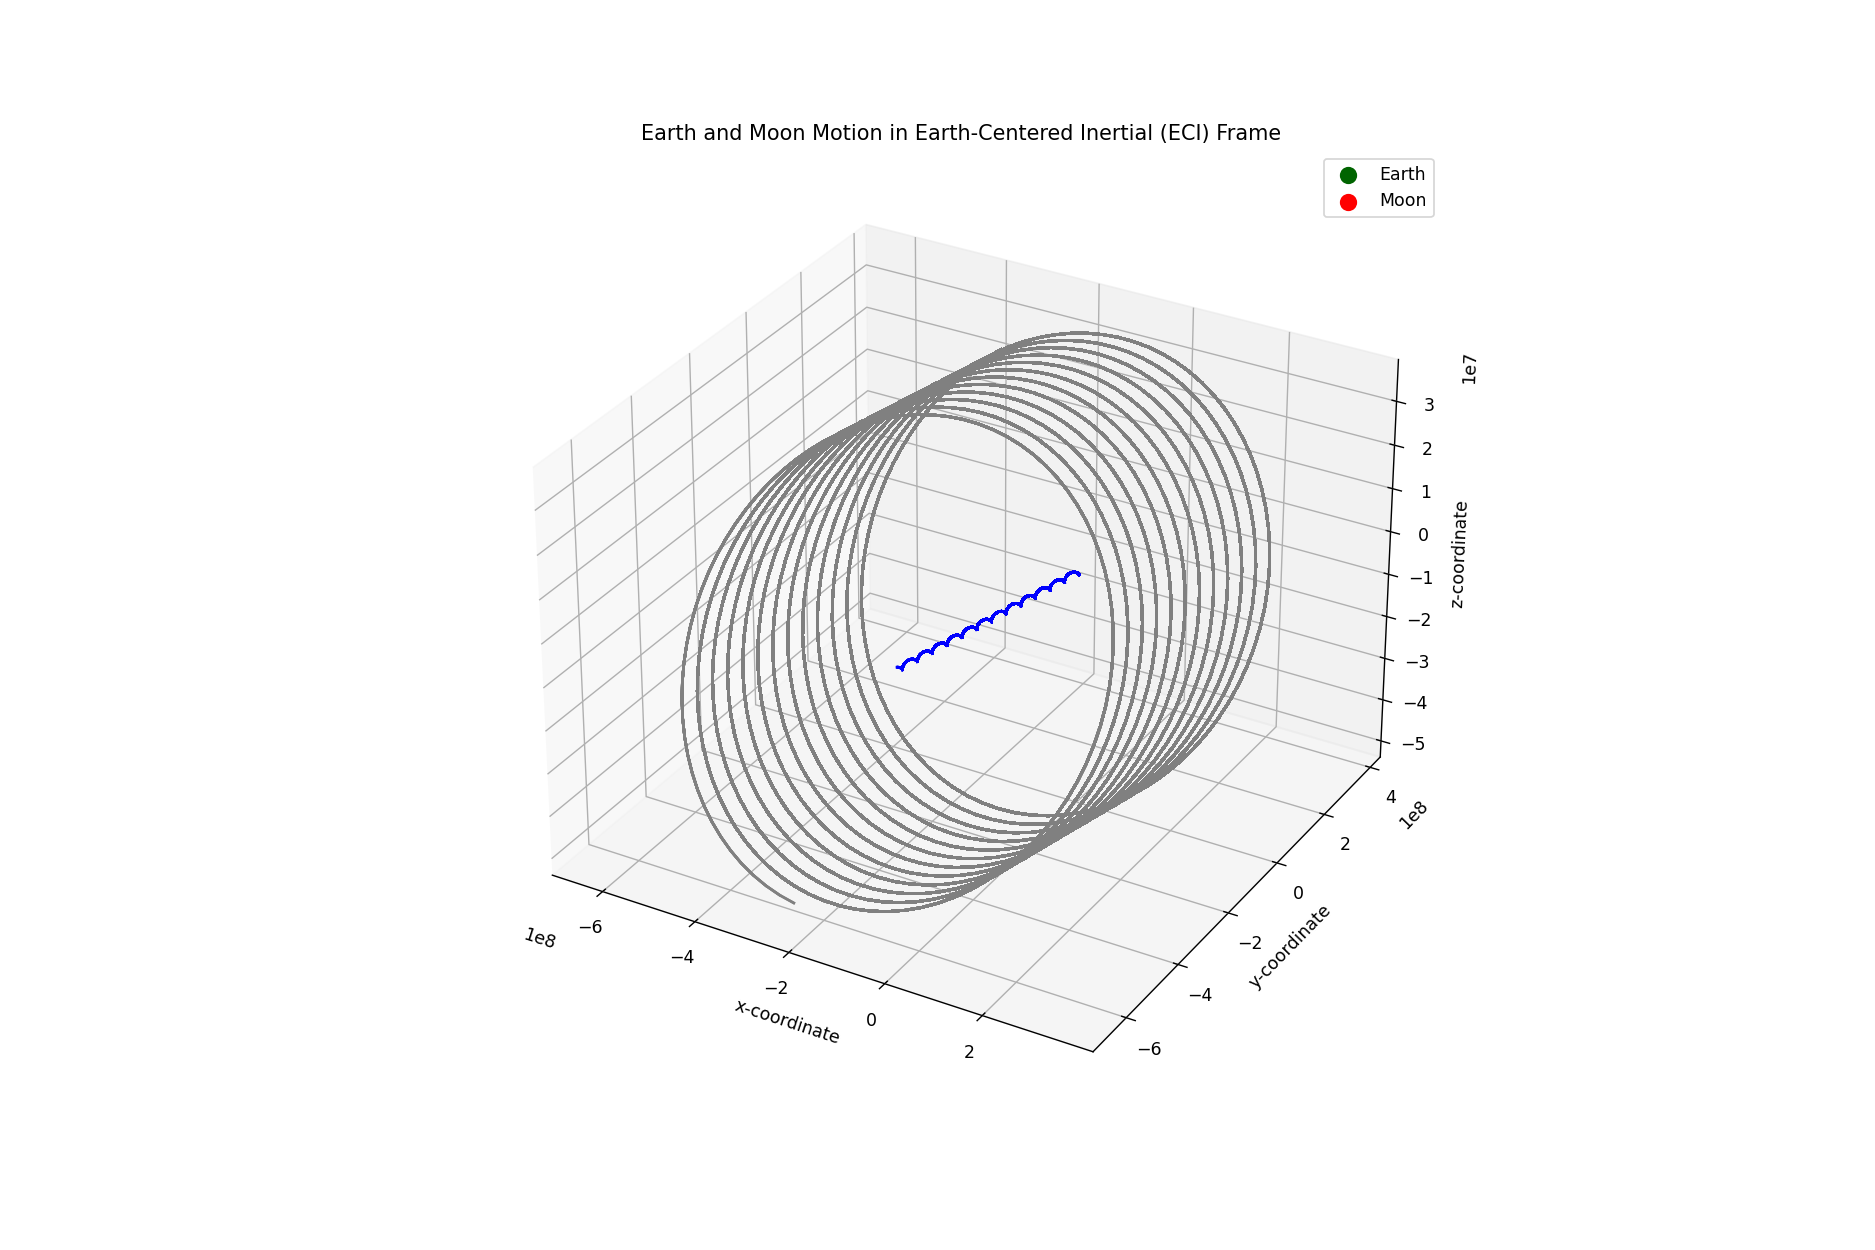

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [6]:
# Animation setup
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")

# Markers for Earth and Moon
earth_marker = [ax.scatter(earth_pos[0, 0], earth_pos[0, 1], earth_pos[0, 2], color="darkgreen", marker="o", s=80, label="Earth")]
moon_marker = [ax.scatter(moon_pos[0, 0], moon_pos[0, 1], moon_pos[0, 2], color="red", marker="o", s=80, label="Moon")]

# Function to update each frame
def update_frame(i, earth_marker, moon_marker):
    earth_marker[0].remove()
    moon_marker[0].remove()

    ax.plot(earth_pos[:i, 0], earth_pos[:i, 1], earth_pos[:i, 2], color="blue")
    ax.plot(moon_pos[:i, 0], moon_pos[:i, 1], moon_pos[:i, 2], color="grey")

    earth_marker[0] = ax.scatter(earth_pos[i - 1, 0], earth_pos[i - 1, 1], earth_pos[i - 1, 2], color="darkblue", marker="o", s=100)
    moon_marker[0] = ax.scatter(moon_pos[i - 1, 0], moon_pos[i - 1, 1], moon_pos[i - 1, 2], color="red", marker="o", s=100)

    return earth_marker, moon_marker

# Set labels and title
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.set_zlabel("z-coordinate")
ax.set_title("Earth and Moon Motion in Earth-Centered Inertial (ECI) Frame")
ax.legend()

# Create the animation
anim = animation.FuncAnimation(fig, update_frame, frames=2000, interval=20, repeat=True, blit=False, fargs=(earth_marker, moon_marker))

plt.show()
anim.save('Q3_a_ECI.gif', writer='pillow')

### b) Earth-Fixed Frame

In [7]:
%reset -f
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib notebook

Time period of moon around Earth in ECI frame is 10690.177010949861 seconds.
Time period of moon around Earth in ECEF frame is 89413.501350135 seconds.


<IPython.core.display.Javascript object>


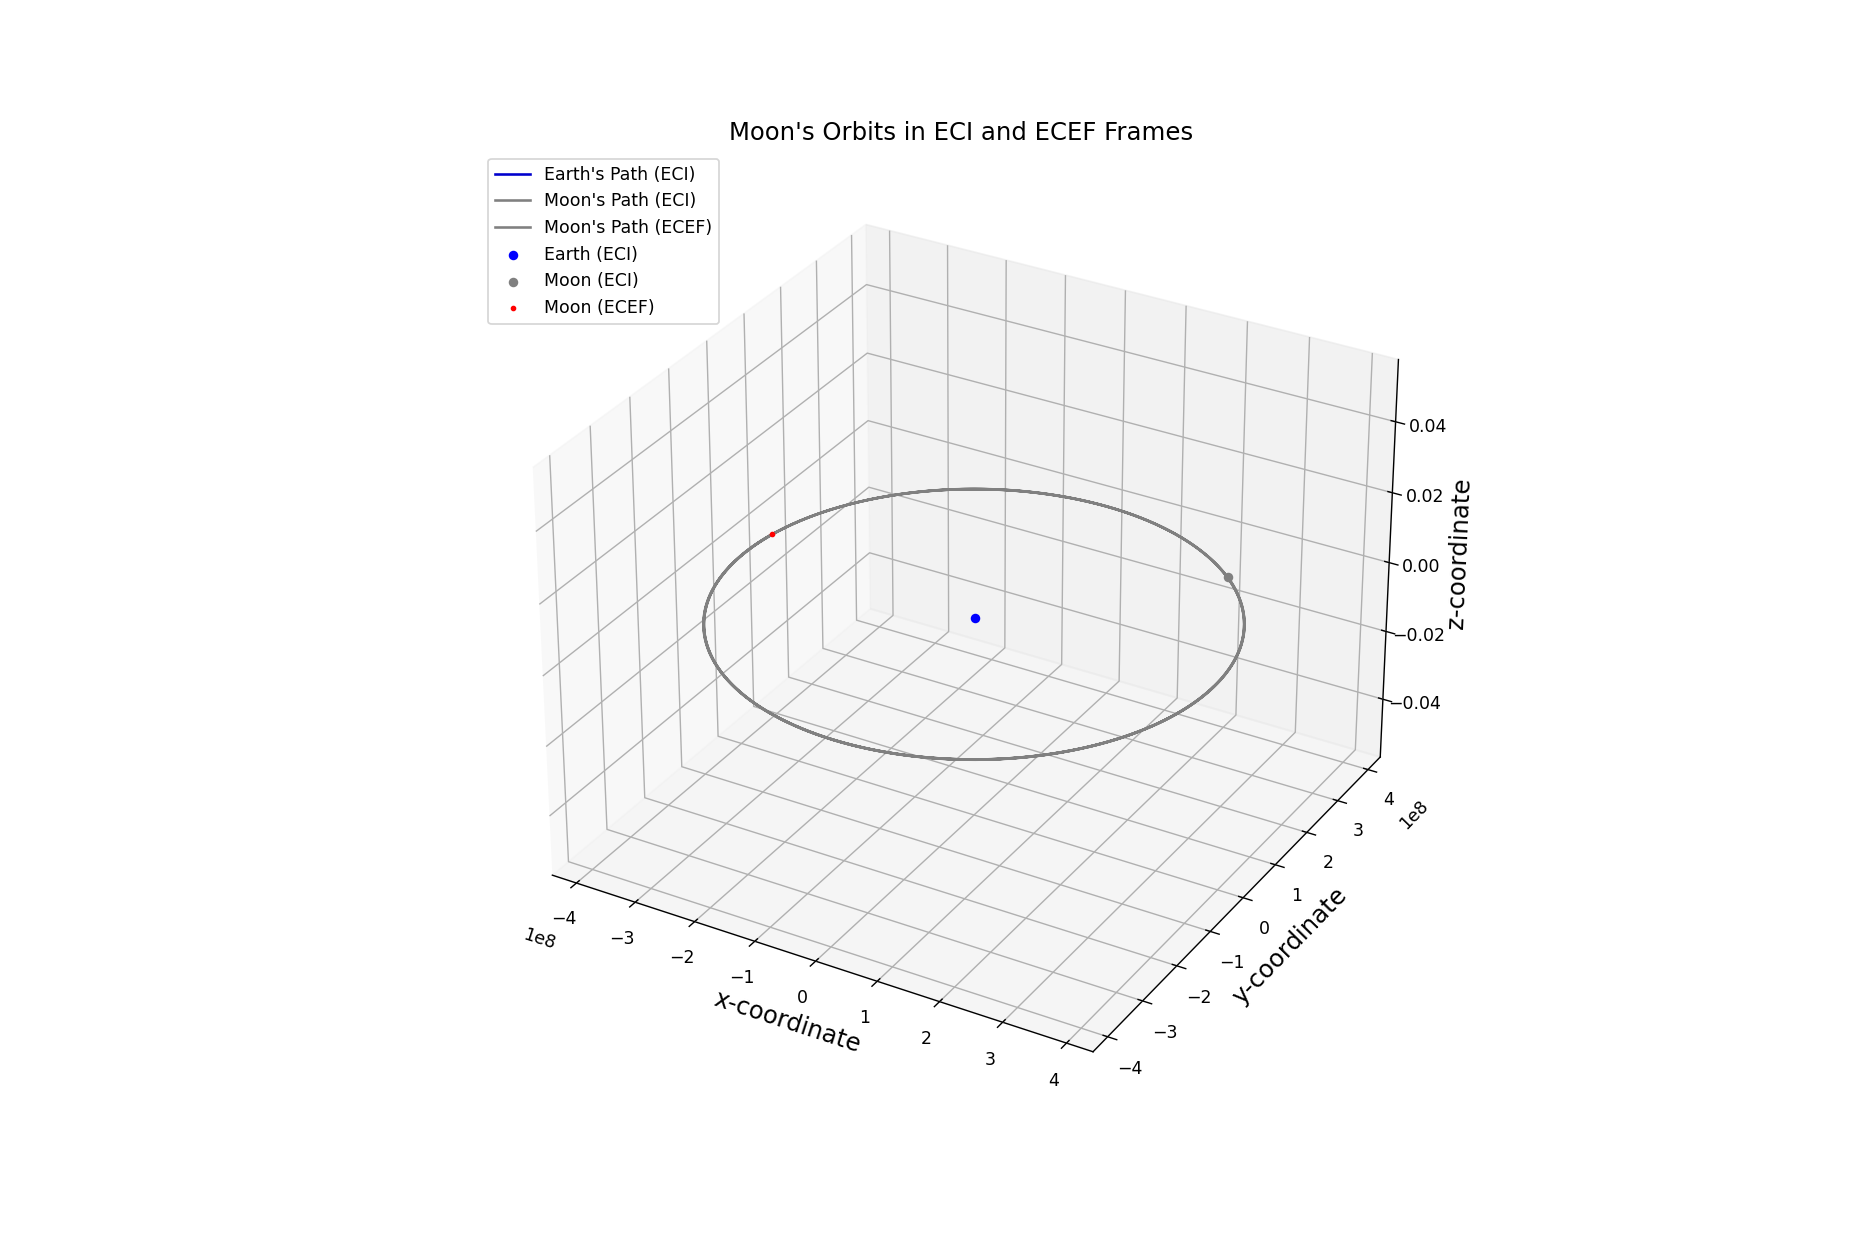

In [10]:
# Constants
G = 6.67384e-11  # Gravitational constant
m_earth = 5.972e+24  # Earth's mass (kg)
m_moon = 7.349e+22  # Moon's mass (kg)
r_earth = np.array([0, 0, 0])  # Earth's initial position
r_moon = np.array([384400000, 0, 0])  # Moon's initial position
r_moon_initial = np.array([384400000, 0, 0])  # Initial Moon position for comparison

v_earth = np.array([0, 0, 0])  # Earth's initial velocity
v_moon = np.array([0, 1022, 0])  # Moon's initial velocity

omega = 7.292e-05  # Earth's angular velocity (rad/s)

# Variables for time period calculation
t1, t2 = 1e18, 1e18  # Time period placeholders
mindist1, mindist2 = 1e18, 1e18  # Minimum distance trackers
flag1, flag2 = 0, 0  # Flags for time period checks

def two_body_eqns(t, w, G, m_earth, m_moon):
    global r_moon_initial, t1, mindist1

    r1, r2 = w[:3], w[3:6]
    v1, v2 = w[6:9], w[9:12]
    
    r12 = np.linalg.norm(r2 - r1)
    
    # Track minimum distance to detect the orbit completion
    if np.linalg.norm(r2 - r_moon_initial) < mindist1 and t > 10000:
        t1 = t
        mindist1 = np.linalg.norm(r2 - r_moon_initial)

    # Gravitational accelerations
    a1 = G * m_moon * (r2 - r1) / r12**3
    a2 = G * m_earth * (r1 - r2) / r12**3
    
    # Return position and velocity derivatives
    r1_dot, r2_dot = v1, v2
    v1_dot, v2_dot = a1, a2
    
    return np.concatenate((r1_dot, r2_dot, v1_dot, v2_dot))

# Initial conditions: Flatten arrays for solve_ivp
init_conditions = np.array([r_earth, r_moon, v_earth, v_moon]).flatten()

# Time span for simulation (1 year in seconds)
time_span = np.linspace(0, 315360, 10000)

# Solve the system of equations
ivp_solution = solve_ivp(
    fun=two_body_eqns,
    t_span=(time_span[0], time_span[-1]),
    y0=init_conditions,
    args=(G, m_earth, m_moon),
    t_eval=time_span,
    method='RK23',
    dense_output=True
)

# Extract the solution
sol = ivp_solution.y.T
r1_sol = sol[:, :3]
r2_sol = sol[:, 3:6]

# Output time period in ECI frame
print(f"Time period of moon around Earth in ECI frame is {t1} seconds.")

def convert_to_ecef(r, t):
    global r_moon_initial, t2, mindist2
    
    # Rotation matrix for Earth-Centered Earth-Fixed (ECEF) frame
    rot_matrix = np.array([
        [np.cos(omega * t), np.sin(omega * t)],
        [-np.sin(omega * t), np.cos(omega * t)]
    ])
    
    coords = np.array([r[0], r[1]])
    rotated_coords = rot_matrix @ coords
    
    # Return converted position
    new_pos = np.array([rotated_coords[0], rotated_coords[1], r[2]])

    # Track minimum distance for time period calculation
    if np.linalg.norm(new_pos - r_moon_initial) < mindist2 and t > 1000:
        t2 = t
        mindist2 = np.linalg.norm(new_pos - r_moon_initial)
    
    return new_pos

# Convert moon's position to ECEF frame and store
r2_ecef = np.array([convert_to_ecef(coor, time) for coor, time in zip(r2_sol, time_span)])

# Output time period in ECEF frame
print(f"Time period of moon around Earth in ECEF frame is {t2} seconds.")

# Plot the orbits in ECI and ECEF frames
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")

# Plot Earth and Moon's path in ECI frame
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="mediumblue", label="Earth's Path (ECI)")
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="grey", label="Moon's Path (ECI)")

# Plot Moon's path in ECEF frame
ax.plot(r2_ecef[:, 0], r2_ecef[:, 1], r2_ecef[:, 2], color='grey', label="Moon's Path (ECEF)")

# Scatter the final positions of Earth and Moon
ax.scatter(r1_sol[-1, 0], r1_sol[-1, 1], r1_sol[-1, 2], marker="o", label="Earth (ECI)", color="blue")
ax.scatter(r2_sol[-1, 0], r2_sol[-1, 1], r2_sol[-1, 2], marker="o", label="Moon (ECI)", color="grey")
ax.scatter(r2_ecef[-1, 0], r2_ecef[-1, 1], r2_ecef[-1, 2], marker=".", label="Moon (ECEF)", color="red")

# Set axis labels and title
ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Moon's Orbits in ECI and ECEF Frames", fontsize=14)
ax.legend(loc="upper left")

plt.show()
plt.savefig("Q3_b_ECEF.png", dpi=300, bbox_inches="tight")

## 4. For any given location on the surface of Earth, find all the times of the year when the moon is visible along with Jupiter within 10 degrees of the line of sight of the moon. [5 Points]

In [11]:
%reset -f
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib notebook

In [14]:
# Constants
G = 6.67384e-11  # Gravitational constant
m_earth = 5.972e+24  # Earth's mass (kg)
m_moon = 7.349e+22  # Moon's mass (kg)
r_earth = np.array([0, 0, 0])  # Earth's initial position
r_moon = np.array([384400000, 0, 0])  # Moon's initial position
r_moon_initial = np.array([384400000, 0, 0])  # Initial Moon position for comparison

v_earth = np.array([0, 0, 0])  # Earth's initial velocity
v_moon = np.array([0, 1022, 0])  # Moon's initial velocity

omega = 7.292e-05  # Earth's angular velocity (rad/s)

# Define Jupiter's approximate position (static for simplicity)
r_jupiter = np.array([778500000000, 0, 0])  # Approximate distance from Earth to Jupiter (in meters)

# Two-Body Equations
def two_body_eqns(t, w, G, m_earth, m_moon):
    r1, r2 = w[:3], w[3:6]
    v1, v2 = w[6:9], w[9:12]
    
    r12 = np.linalg.norm(r2 - r1)
    
    # Gravitational accelerations
    a1 = G * m_moon * (r2 - r1) / r12**3
    a2 = G * m_earth * (r1 - r2) / r12**3
    
    r1_dot, r2_dot = v1, v2
    v1_dot, v2_dot = a1, a2
    
    return np.concatenate((r1_dot, r2_dot, v1_dot, v2_dot))

# Initial conditions for the Moon-Earth system
init_conditions = np.array([r_earth, r_moon, v_earth, v_moon]).flatten()
time_span = np.linspace(0, 31536000, 31536)  # Time span for 1 year, in seconds

# Solve the Two-Body Problem
ivp_solution = solve_ivp(
    fun=two_body_eqns,
    t_span=(time_span[0], time_span[-1]),
    y0=init_conditions,
    args=(G, m_earth, m_moon),
    t_eval=time_span,
    method='RK23',
    dense_output=True
)

# Extract the solution
sol = ivp_solution.y.T
r1_sol = sol[:, :3]  # Earth position
r2_sol = sol[:, 3:6]  # Moon position

# Convert function to ECEF frame
def convert_to_ecef(r, t):
    rot_matrix = np.array([
        [np.cos(omega * t), np.sin(omega * t)],
        [-np.sin(omega * t), np.cos(omega * t)]
    ])
    coords = np.array([r[0], r[1]])
    rotated_coords = rot_matrix @ coords
    return np.array([rotated_coords[0], rotated_coords[1], r[2]])

# Convert Moon's position to ECEF frame
r2_ecef = [convert_to_ecef(coor, time) for coor, time in zip(r2_sol, time_span)]

# Calculate angular distance between the Moon and Jupiter
def angular_distance(moon_pos, jupiter_pos):
    # Use dot product to find the angle between the vectors
    dot_prod = np.dot(moon_pos, jupiter_pos)
    mag_moon = np.linalg.norm(moon_pos)
    mag_jupiter = np.linalg.norm(jupiter_pos)
    cos_angle = dot_prod / (mag_moon * mag_jupiter)
    angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))  # Ensure value is within valid range for arccos
    return np.degrees(angle)

# Determine times when Moon and Jupiter are within 10 degrees of each other
moon_visible_times = []

for i in range(len(r2_ecef)):
    moon_pos = r2_ecef[i]
    angle = angular_distance(moon_pos, r_jupiter)
    
    # Check if angle is within 10 degrees
    if angle <= 10:
        moon_visible_times.append(time_span[i])

# Convert visible times to hours
moon_visible_hours = np.array(moon_visible_times) / (60 * 60)
np.set_printoptions(threshold=np.inf)
# Print visible times in hours
print("Moon and Jupiter are visible at the following times (in hours):")
print(moon_visible_hours)

Moon and Jupiter are visible at the following times (in hours):
[0.00000000e+00 2.77786586e-01 5.55573173e-01 2.41674330e+01
 2.44452196e+01 2.47230062e+01 2.50007928e+01 2.52785794e+01
 4.91682258e+01 4.94460124e+01 4.97237990e+01 5.00015855e+01
 5.02793721e+01 7.38912320e+01 7.41690186e+01 7.44468051e+01
 7.47245917e+01 7.50023783e+01 9.88920247e+01 9.91698113e+01
 9.94475979e+01 9.97253845e+01 1.00003171e+02 1.23615031e+02
 1.23892818e+02 1.24170604e+02 1.24448391e+02 1.24726177e+02
 1.48338037e+02 1.48615824e+02 1.48893610e+02 1.49171397e+02
 1.49449183e+02 1.73338830e+02 1.73616616e+02 1.73894403e+02
 1.74172190e+02 1.74449976e+02 1.98061836e+02 1.98339623e+02
 1.98617409e+02 1.98895196e+02 1.99172982e+02 2.23062629e+02
 2.23340415e+02 2.23618202e+02 2.23895989e+02 2.24173775e+02
 2.47785635e+02 2.48063422e+02 2.48341208e+02 2.48618995e+02
 2.48896781e+02 2.72508641e+02 2.72786428e+02 2.73064214e+02
 2.73342001e+02 2.73619788e+02 2.97509434e+02 2.97787221e+02
 2.98065007e+02 2.983